# Homework 4 - Basic Bayes
You have seen a demostration of Bayesian inference in section. Your homework will explore simple variation of it to solidify your understanding of priors, likelihoods, and posteriors.

## Intro: Poisson Likelihood + Gamma Prior -> Gamma Posterior
### Setup
Assume we have $X_1, X_2, \dots, X_n$ independent and identically distributed (i.i.d) by Poisson distribution. So, 

$$X_i \sim \text{Pois}(\lambda) \text{ for all } i.$$

You can imagine $x_i$ as counting the number of telephone calls in day $i$, which follows a Poisson distribution, where $\lambda$ is the (unknown) average number of phone calls a day.

**Goal:** We want to conduct Bayesian inference on the data $x_1, \dots, x_n$ in order to infer the unknown parameter $\lambda$.

### a. Likelihood $p(x | \lambda)$
The pmf of Poisson is 

$$p(x | \lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}.$$

Therefore, by i.i.d. assumption, the joint likelihood of all the $n$ pieces of data will be the product of the pmf, simplified for you here
$$p (x_1, \dots, x_n) = \frac{\lambda^{x_1 + \dots  + x_n} e^{-n\lambda}}{x_1! \dots x_n!}.$$

### b. Prior $p(\lambda)$
Remember, we don't know what $\lambda$ is, so we will treat it as a random variable $\Lambda$ (this is capital letter for $\lambda$). Magically, if we let $\Lambda$ follow a Gamma distribution, we get a nice posterior, so we will do just that. Now, the pdf of gamma(shape=$\alpha$, rate=$\beta$) is

$$p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda},$$

where $\Gamma(\cdot)$ is the gamma function. When you choose your prior, **choose any $\alpha >0, \beta>0$ that is suitable for the prior knowledge you have about the data**. See section notes if you feel unfamiliar about it.

_Do not be intimidated by this crazy formula! It will be very friendly to us in the end of the calculation. Question: doesn't the gamma distribution look kind of similar to the Poisson distribution? This may give us a sense that the posterior will be nice! :)_

### c. Posterior $p(\lambda | x)$
We're almost done. 

Recall: The formula of the posterior distribution is
$$
p(\lambda | x) = \frac{p(x|\lambda)p(\lambda)}{\int_{\lambda}p(x|\lambda)p(\lambda)d\lambda} = \frac{\text{likelihood} \cdot \text{prior}}{\text{normalizing constant}}.
$$
We will skip the algebra and just tell you that 
$$
p(\lambda | x) = \frac{\lambda^{x_1 + \dots + x_n + \alpha + 1} e^{-(n + \beta)\lambda}}{\text{normalizing constant}}.
$$
The normalizing constant is not very important, the **MAIN TAKEAWAY IS THAT THE POSTERIOR IS ALSO DISTRIBUTED GAMMA!** In fact, the posterior is 
$$
\text{gamma}(x_1 + \dots + x_n + \alpha, n + \beta).
$$

### Summary
- Likelihood $p(x | \lambda) \sim \text{Pois}(\lambda)$
- Prior $p(\lambda) \sim \text{gamma}(\alpha, \beta)$
- Posterior $p(\lambda | x)\sim \text{gamma}(x_1 + \dots + x_n + \alpha, n + \beta)$

With this, you are ready for some experiments in this homework.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 0 Data
Let the data ($n=20$) be

$$
x = [7, 5, 10, 6, 7, 7, 9, 10, 7, 8, 10, 2, 9, 10, 10, 8, 6, 8, 3, 15]
$$

In [2]:
x = [7, 5, 10, 6, 7, 7, 9, 10, 7, 8, 10, 2, 9, 10, 10, 8, 6, 8, 3, 15]
n = len(x)
print('n:', n, '\nmean:', np.mean(x))

n: 20 
mean: 7.85


# 1 Peaked Prior

We want to create a (peaked) prior that reflects our belief about what the data (number of phone calls) is.     

Suppose Mrs. Morgan said, "From my experience and memory, I think the average number of phone calls every day is 6. Most of the time (like 95% of the time), it's between 4 to 8 calls every day."

## 1.1 Prior
**Task:**
1. [2 pt] Define appropriate ```alpha_prior_peaked```, ```beta_prior_peaked``` to obtain a suitable prior gamma($\alpha, \beta$) with mean 6 and variance 1. 

    (Hint: mean = $\frac{\alpha}{\beta}$ and variance = $\frac{\alpha}{\beta^2}$. It may also be easier to define $\beta$ before defining $\alpha$.)
2. [1 pt] Compute ```prior_peaked```, which is the pdf of gamma($\alpha, \beta$). Make sure you read the scipy documentation correctly and input the correct arguments (rate and scale are reciprocals of each other!).
3. [1 pt] Plot the density of the prior.

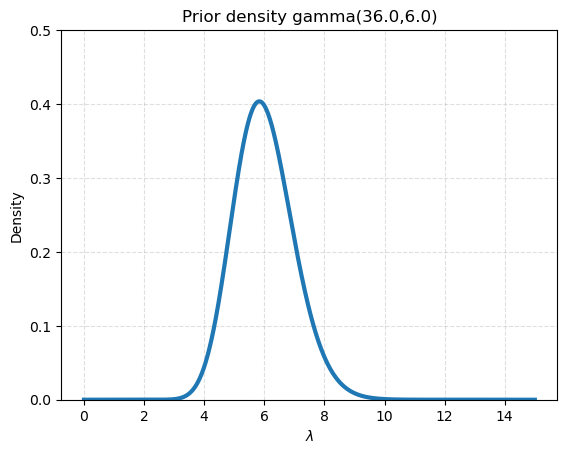

In [3]:
beta_prior_peaked = 6
alpha_prior_peaked = 36

lamb = np.linspace(0, 15, 1000)
prior_peaked = stats.gamma(alpha_prior_peaked, 
                           scale = 1 / beta_prior_peaked).pdf(lamb)

# plot
plt.plot(lamb, prior_peaked, linewidth=3)
plt.title(f'Prior density gamma({alpha_prior_peaked:.1f},{beta_prior_peaked:.1f})')
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--')
plt.ylim([0,0.5])
plt.show()

## 1.2 Posterior
Using the same peaked prior, you will perform bayesian analysis on two different sets of data:
- ```x```, the original 20 data
- ```x_short```, only the first 3 data points

Let the posterior parameters be
- ```alpha_post_peaked```, be the posterior shape for full data ```x```.
- ```beta_post_peaked```, be the posterior rate for full data ```x```.
- ```alpha_post_peaked_short```, be the posterior shape for short data ```x_short```.
- ```beta_post_peaked_short```, be the posterior rate for short data ```x_short```.

**Task:**

1. [4 pt] Define ```alpha_post_peaked```, ```beta_post_peaked```, ```alpha_post_peaked_short```, and ```beta_post_peaked_short``` using the formula in the introduction

2. [2 pt] Define ```posterior_peaked``` and ```posterior_peaked_short```, the respective pdf of the posteriors. Use the same horizontal axis ```lamb``` from previous parts.

3. [1 pt] Plot the three densities on the same figure.

In [4]:
x_short = x[:3]
print('x_short:', x_short)

x_short: [7, 5, 10]


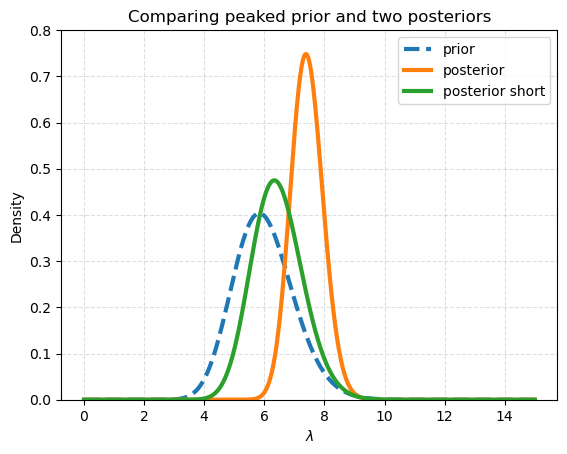

In [5]:
alpha_post_peaked = np.sum(x) + alpha_prior_peaked
beta_post_peaked = n + beta_prior_peaked
posterior_peaked = 
stats.gamma(alpha_post_peaked, scale = 1 / beta_post_peaked).pdf(lamb)

alpha_post_peaked_short = np.sum(x_short) + alpha_prior_peaked
beta_post_peaked_short = 3 + beta_prior_peaked
posterior_peaked_short = 
stats.gamma(alpha_post_peaked_short, scale = 
            1 / beta_post_peaked_short).pdf(lamb)

# plot
plt.plot(lamb, prior_peaked, '--', linewidth=3, label='prior')
plt.plot(lamb, posterior_peaked, linewidth=3, label='posterior')
plt.plot(lamb, posterior_peaked_short, linewidth=3,label='posterior short')
plt.title(f'Comparing peaked prior and two posteriors'); 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--'); plt.legend()
plt.ylim([0,0.8])
plt.show()

## 1.3 MAP Estimator
**Task:**

1. [2 pt] Compute the MAP estimator for both posteriors, storing it as ```lamb_MAP_peaked``` and ```lamb_MAP_peaked_short```. 

2. [2 pt] Print both these values, rounded to 3 decimal places.

3. [2 pt] What do you observe about the MAP estimator for the full data and short data? What might this have to do with the prior?

    **Ans:** Posterior short and posterior don't have the same MAP. The MAP for posterior short is very close to the MAP of prior. The full data of posterior gives a more comprehensive and accurate MAP, which is less influenced by prior. The posterior short, on the contrary, is highly affected by prior due to its lack of data. 

In [6]:
lamb_MAP_peaked = lamb[np.argmax(posterior_peaked)]
lamb_MAP_peaked_short = lamb[np.argmax(posterior_peaked_short)]

print('lamb_MAP_peaked      :', np.round(lamb_MAP_peaked,3))
print('lamb_MAP_peaked_short:', np.round(lamb_MAP_peaked_short,3))

lamb_MAP_peaked      : 7.387
lamb_MAP_peaked_short: 6.336


# 2 Flat Prior
Now, compare the peaked prior (which made the prior conform to the assumptions made by Mrs. Morgan) to the next procedure, which assumes a prior that is very conservative, i.e., a flat prior.

## 2.1 Prior
**Task:**
1. [2 pt] Define appropriate ```alpha_prior_flat```, ```beta_prior_flat``` to obtain a suitable prior gamma($\alpha, \beta$) with mean 15 and variance 100. 
2. [1 pt] Compute ```prior_flat```, which is the pdf of gamma($\alpha, \beta$). Make sure you read the scipy documentation correctly and input the correct arguments (rate and scale are reciprocals of each other!). Use the same ```lamb``` as before.
3. [1 pt] Plot the density of the prior.

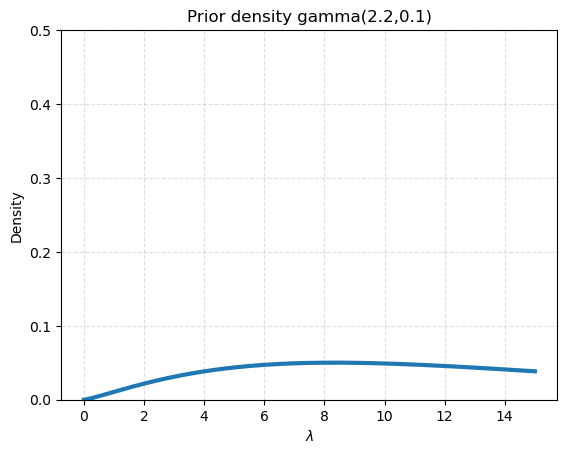

In [7]:
beta_prior_flat = 0.15
alpha_prior_flat = 15 * beta_prior_flat

prior_flat = stats.gamma(alpha_prior_flat, 
                         scale = 1 / beta_prior_flat).pdf(lamb)


# plot
plt.plot(lamb, prior_flat, linewidth=3)
plt.title(f'Prior density gamma({alpha_prior_flat:.1f},{beta_prior_flat:.1f})'); 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--')
plt.ylim([0,0.5])
plt.show()

## 2.2 Posterior
Like before, you will perform bayesian analysis on ```x``` and ```x_short```.

Let the posterior parameters be
- ```alpha_post_flat```, be the posterior shape for full data ```x```.
- ```beta_post_flat```, be the posterior rate for full data ```x```.
- ```alpha_post_flat_short```, be the posterior shape for short data ```x_short```.
- ```beta_post_flat_short```, be the posterior rate for short data ```x_short```.

**Task:**

1. [4 pt] Define ```alpha_post_flat```, ```beta_post_flat```, ```alpha_post_flat_short```, and ```beta_post_flat_short``` using the formula in the introduction.

2. [2 pt] Define ```posterior_flat``` and ```posterior_flat_short```, the respective pdf of the posteriors. Use the same horizontal axis ```lamb``` from previous parts.

3. [1 pt] Plot the three densities on the same figure.

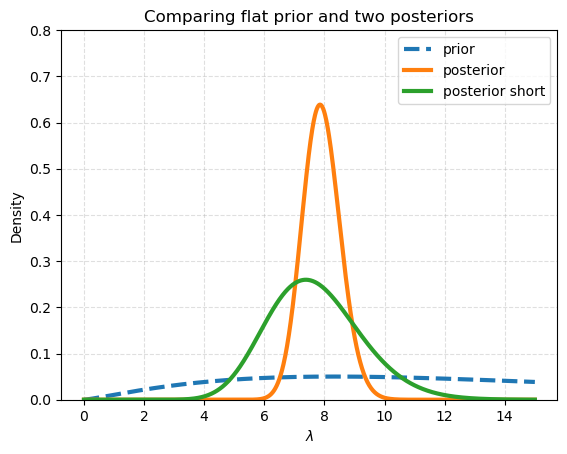

In [8]:
alpha_post_flat = np.sum(x) + alpha_prior_flat
beta_post_flat = n + beta_prior_flat

alpha_post_flat_short = np.sum(x_short) + alpha_prior_flat
beta_post_flat_short = len(x_short) + beta_prior_flat

posterior_flat = stats.gamma(alpha_post_flat, 
                             scale = 1 / beta_post_flat).pdf(lamb)
posterior_flat_short = stats.gamma(alpha_post_flat_short, 
                            scale = 1 / beta_post_flat_short).pdf(lamb)

# plot
plt.plot(lamb, prior_flat, '--', linewidth=3, label='prior')
plt.plot(lamb, posterior_flat, linewidth=3, label='posterior')
plt.plot(lamb, posterior_flat_short, linewidth=3,label='posterior short')
plt.title(f'Comparing flat prior and two posteriors'); 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--'); plt.legend()
plt.ylim([0,0.8])
plt.show()

## 2.3 
**Task:**

1. [2 pt] Compute the MAP estimator for both posteriors, storing it as ```lamb_MAP_flat``` and ```lamb_MAP_flat_short```. 

2. [2 pt] Print both these values, rounded to 3 decimal places.

In [9]:
lamb_MAP_flat = lamb[np.argmax(posterior_flat)]
lamb_MAP_flat_short = lamb[np.argmax(posterior_flat_short)]

print('lamb_MAP_flat      :', np.round(lamb_MAP_flat,3))
print('lamb_MAP_flat_short:', np.round(lamb_MAP_flat_short,3))

lamb_MAP_flat      : 7.853
lamb_MAP_flat_short: 7.387


# 3 Compare peak and flat with full data
**Task:**

1. [1 pt] Run the cell below and produce the correct plots. You should not need to change any code here.

2. [1 pt] With sufficiently large amount of data, does it seem to matter very much what the prior is?

    **Ans:** Prior gets less dictating in determining the posterior if we have sufficient data. The plot shows that the two posteriors are getting closer than priors. Reflecting on the statistical meaning of prior and posterior, this indicates data (posterior) is replacing the dominance of prior as data accumulates. If the dataset is sufficiently large, the choice of prior seems trivial. 

lamb_MAP_peaked: 7.387
lamb_MAP_flat  : 7.853
true lambda    : 8


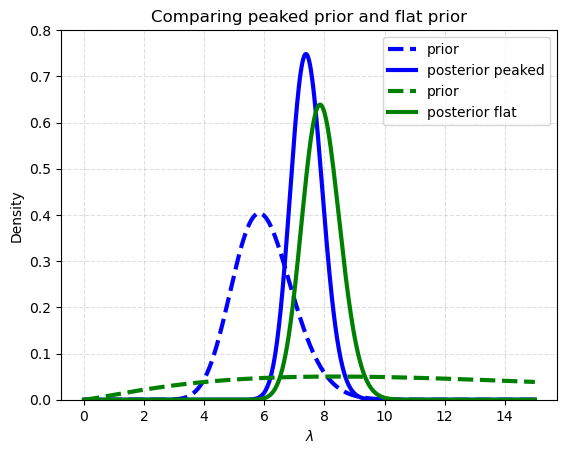

In [10]:
# MAP
print('lamb_MAP_peaked:', np.round(lamb_MAP_peaked,3))
print('lamb_MAP_flat  :', np.round(lamb_MAP_flat,3))
print('true lambda    : 8')

# plot
plt.plot(lamb, prior_peaked, 'b--', linewidth=3, label='prior')
plt.plot(lamb, posterior_peaked, 'b', linewidth=3, label='posterior peaked')
plt.plot(lamb, prior_flat, 'g--', linewidth=3, label='prior')
plt.plot(lamb, posterior_flat, 'g', linewidth=3,label='posterior flat')
plt.title(f'Comparing peaked prior and flat prior'); 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--'); plt.legend()
plt.ylim([0,0.8])
plt.show()
